<a href="https://colab.research.google.com/github/daniellemsa/Projeto--Colpocitologia-Onc-tica--2015/blob/main/Exames_Citopatol%C3%B3gicos_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Configurações
np.random.seed(42)
random.seed(42)
total_records = 1000  # Ajuste conforme necessário

# Faixas etárias e distribuição (baseado nos dados de maio/junho)
faixas_etarias = [
    "Até 11 anos", "12-14 anos", "15-19 anos", "20-24 anos",
    "25-29 anos", "30-34 anos", "35-39 anos", "40-44 anos",
    "45-49 anos", "50-54 anos", "55-59 anos", "60-64 anos",
    "Acima de 64 anos"
]
# Distribuição normalizada para somar exatamente 1
dist_faixas = [0.0002, 0.003, 0.05, 0.09, 0.11, 0.12, 0.11, 0.11, 0.11, 0.10, 0.08, 0.06, 0.0568]  # Ajustado o último valor

# Outras categorias
cores = ["Branca", "Preta", "Parda", "Amarela", "Sem informação"]
dist_cores = [0.15, 0.015, 0.03, 0.005, 0.8]  # Soma 1

escolaridades = [
    "Ignorado/em branco", "Analfabeta", "Ensino fundamental incompleto",
    "Ensino fundamental completo", "Ensino médio completo",
    "Ensino superior completo"
]
dist_escolaridade = [0.75, 0.002, 0.05, 0.03, 0.15, 0.018]  # Soma 1

citologia_anterior = ["Sim", "Não", "Não sabe", "Não informado"]
dist_citologia = [0.85, 0.08, 0.05, 0.02]  # Soma 1

adequabilidade = ["Satisfatório", "Insatisfatório"]
dist_adequabilidade = [0.99, 0.01]  # Soma 1

resultados = ["Normal", "Anormal", "Inconclusivo"]
dist_resultados = [0.02, 0.97, 0.01]  # Soma 1

tipos_anormais = ["ASC-US", "ASC-H", "LSIL", "HSIL", "AGC", "AIS", "Carcinoma"]
dist_tipos = [0.4, 0.1, 0.3, 0.15, 0.03, 0.01, 0.01]  # Soma 1

# Verificando as somas
print(f"Soma dist_faixas: {sum(dist_faixas)}")  # Deve mostrar 1.0

# Gerar dados
data = []
start_date_maio = datetime(2015, 5, 1)
start_date_junho = datetime(2015, 6, 1)

for i in range(1, total_records + 1):
    # Definir mês (40% maio, 60% junho)
    if random.random() < 0.4:
        data_exame = start_date_maio + timedelta(days=random.randint(0, 30))
        mes = "mai"
    else:
        data_exame = start_date_junho + timedelta(days=random.randint(0, 29))
        mes = "jun"

    # Faixa etária e idade
    faixa = np.random.choice(faixas_etarias, p=dist_faixas)

   # Extrair limites de idade da faixa etária
    if faixa == "Até 11 anos":
        idade_min, idade_max = 0, 11
    elif faixa == "Acima de 64 anos":
        idade_min, idade_max = 65, 90  # Assumindo máximo de 90 anos
    else:
        # Split the string by '-' and ' ' to get the age range
        idade_min = int(faixa.split('-')[0].split()[0])
        idade_max = int(faixa.split('-')[1].split()[0])

    idade = random.randint(idade_min, idade_max)


    # Demais atributos
    cor = np.random.choice(cores, p=dist_cores)
    escolaridade = np.random.choice(escolaridades, p=dist_escolaridade)
    cit_ant = np.random.choice(citologia_anterior, p=dist_citologia)
    adeq = np.random.choice(adequabilidade, p=dist_adequabilidade)
    resultado = np.random.choice(resultados, p=dist_resultados)

    tipo = "-"
    if resultado == "Anormal":
        tipo = np.random.choice(tipos_anormais, p=dist_tipos)
    elif resultado == "Inconclusivo":
        tipo = "Amostra insuficiente"

    data.append([
        f"{mes}_{str(i).zfill(4)}",
        data_exame.strftime("%d/%m/%Y"),
        idade,
        faixa,
        cor,
        escolaridade,
        cit_ant,
        adeq,
        resultado,
        tipo
    ])

# Criar DataFrame
df = pd.DataFrame(data, columns=[
    "ID", "Data_Exame", "Idade", "Faixa_Etaria", "Cor_Raca",
    "Escolaridade", "Citologia_Anterior", "Adequabilidade",
    "Resultado", "Tipo_Resultado"
])

# Salvar CSV otimizado
df.to_csv("exames_papanicolau_powerbi.csv", index=False, encoding='utf-8-sig')


# Salvar CSV
df.to_csv("exames_citopatologicos_sp_2015.csv", index=False, encoding="utf-8-sig")
print(f"Arquivo CSV gerado com sucesso! {total_records} registros criados.")

Soma dist_faixas: 0.9999999999999998
Arquivo CSV gerado com sucesso! 1000 registros criados.


In [ ]:
df= pd.read_csv('exames_citopatologicos_sp_2015.csv')

In [ ]:
 # Distribuição por faixa etária
dist_idade = df['Faixa_Etaria'].value_counts(normalize=True).sort_index()
print("Distribuição por faixa etária:\n", dist_idade)


Distribuição por faixa etária:
 Faixa_Etaria
15-19 anos          0.055
20-24 anos          0.110
25-29 anos          0.108
30-34 anos          0.111
35-39 anos          0.094
40-44 anos          0.117
45-49 anos          0.115
50-54 anos          0.103
55-59 anos          0.081
60-64 anos          0.056
Acima de 64 anos    0.050
Name: proportion, dtype: float64


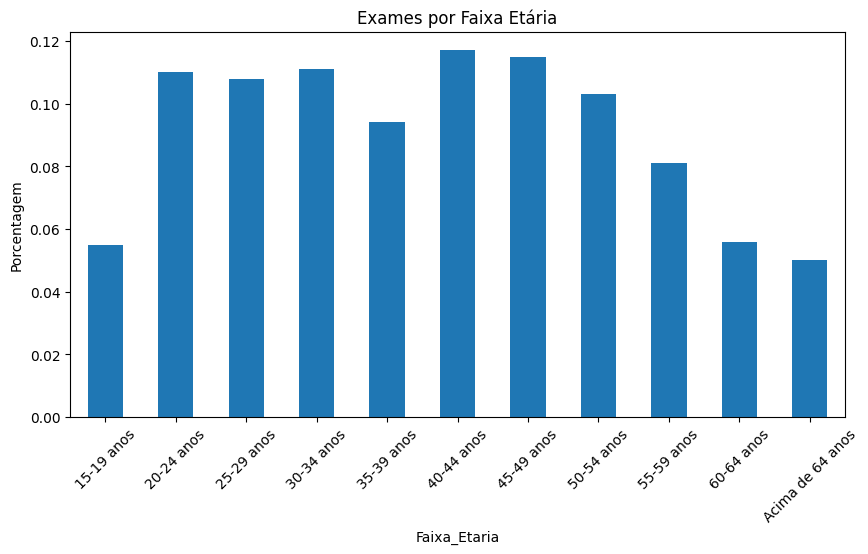

In [ ]:
# Gráfico
dist_idade.plot(kind='bar', title='Exames por Faixa Etária', figsize=(10, 5))
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 2. Resultados anormais por escolaridade
cross_escolaridade = pd.crosstab(df['Escolaridade'], df['Resultado'], normalize='index')
print("\nResultados por escolaridade:\n", cross_escolaridade)



Resultados por escolaridade:
 Resultado                       Anormal  Inconclusivo    Normal
Escolaridade                                                   
Analfabeta                     1.000000      0.000000  0.000000
Ensino fundamental completo    0.965517      0.000000  0.034483
Ensino fundamental incompleto  0.982143      0.000000  0.017857
Ensino médio completo          0.974194      0.012903  0.012903
Ensino superior completo       1.000000      0.000000  0.000000
Ignorado/em branco             0.970509      0.012064  0.017426


In [ ]:
# Verifique a contagem absoluta de registros por categoria
print(df['Escolaridade'].value_counts())

Escolaridade
Ignorado/em branco               746
Ensino médio completo            155
Ensino fundamental incompleto     56
Ensino fundamental completo       29
Ensino superior completo          11
Analfabeta                         3
Name: count, dtype: int64


In [ ]:
# 3. Adequabilidade x Resultados
cross_adequabilidade = pd.crosstab(df['Adequabilidade'], df['Resultado'])
print("\nAdequabilidade vs Resultados:\n", cross_adequabilidade)


Adequabilidade vs Resultados:
 Resultado       Anormal  Inconclusivo  Normal
Adequabilidade                               
Insatisfatório        7             0       0
Satisfatório        965            11      17


In [ ]:
# Exemplo: "Qual a proporção de HSIL (lesões graves) em mulheres acima de 40 anos?"
hsil_40mais = df[(df['Idade'] >= 40) & (df['Tipo_Resultado'] == 'HSIL')].shape[0] / df[df['Idade'] >= 40].shape[0]
print(f"\nProporção de HSIL em 40+: {hsil_40mais:.2%}")


Proporção de HSIL em 40+: 12.84%


In [ ]:
# Exemplo: "Qual a proporção de HSIL (lesões graves) em mulheres acima de 30 anos?"
hsil_30mais = df[(df['Idade'] >= 30 ) & (df['Tipo_Resultado'] == 'HSIL')].shape[0] / df[(df['Idade'] >= 30) & (df['Idade'] <= 40)].shape[0]
print(f"\nProporção de HSIL em 30+: {hsil_30mais:.2%}")


Proporção de HSIL em 30+: 44.89%


In [ ]:
# Exemplo: "Qual a proporção de HSIL (lesões graves) em mulheres acima de 50 anos?"
hsil_50mais = df[(df['Idade'] >= 50 ) & (df['Tipo_Resultado'] == 'HSIL')].shape[0] / df[df['Idade'] >= 50].shape[0]
print(f"\nProporção de HSIL em 50+: {hsil_50mais:.2%}")


Proporção de HSIL em 50+: 12.41%


In [ ]:
# Exemplo: "Qual a proporção de HSIL (lesões graves) em mulheres acima de 60 anos?"
hsil_60mais = df[(df['Idade'] >= 60) & (df['Tipo_Resultado'] == 'HSIL')].shape[0] / df[df['Idade'] >= 60].shape[0]
print(f"\nProporção de HSIL em 60+: {hsil_60mais:.2%}")


Proporção de HSIL em 60+: 13.21%


In [ ]:
import seaborn as sns  # Adicione esta linha no início do seu código
import matplotlib.pyplot as plt

In [ ]:
# Codificar variáveis categóricas
df_encoded = pd.get_dummies(df, columns=['Faixa_Etaria', 'Cor_Raca', 'Escolaridade'])

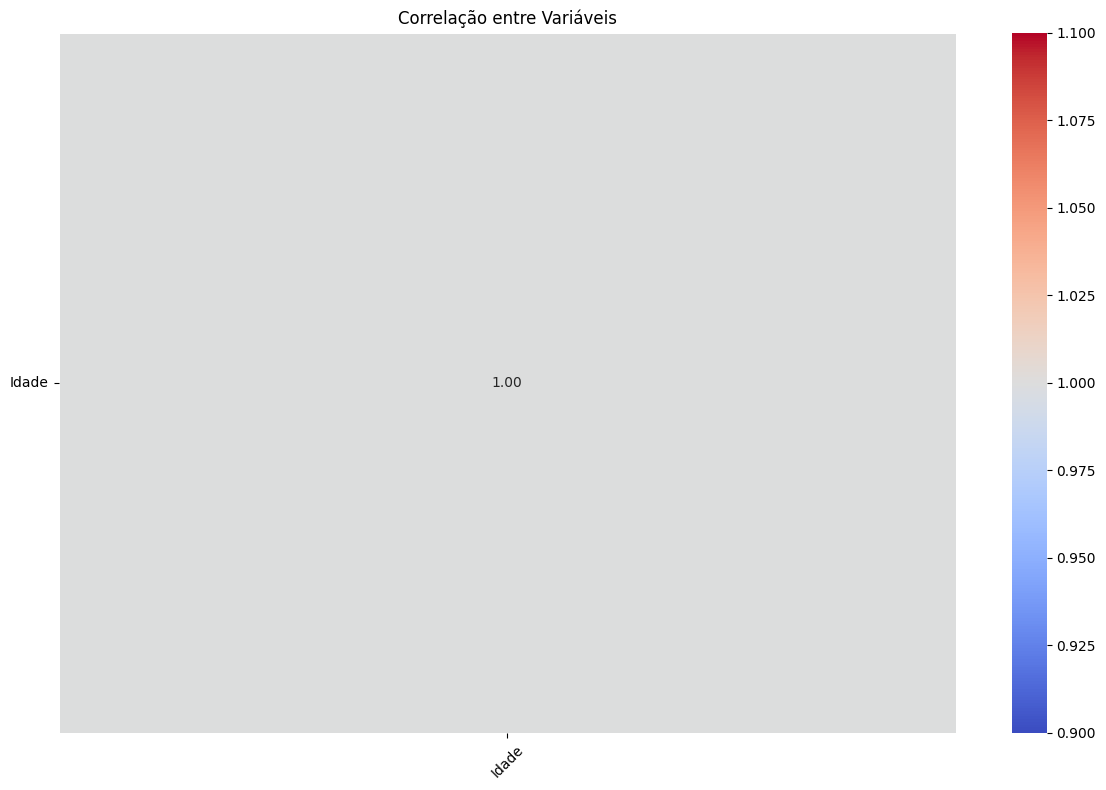

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 2. Matriz de correlação
plt.figure(figsize=(12, 8))
# Calculate correlation only for numeric features
numeric_df = df_encoded.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre Variáveis')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

In [ ]:

# Forçar conversão de todas as colunas para numérico (se aplicável)
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

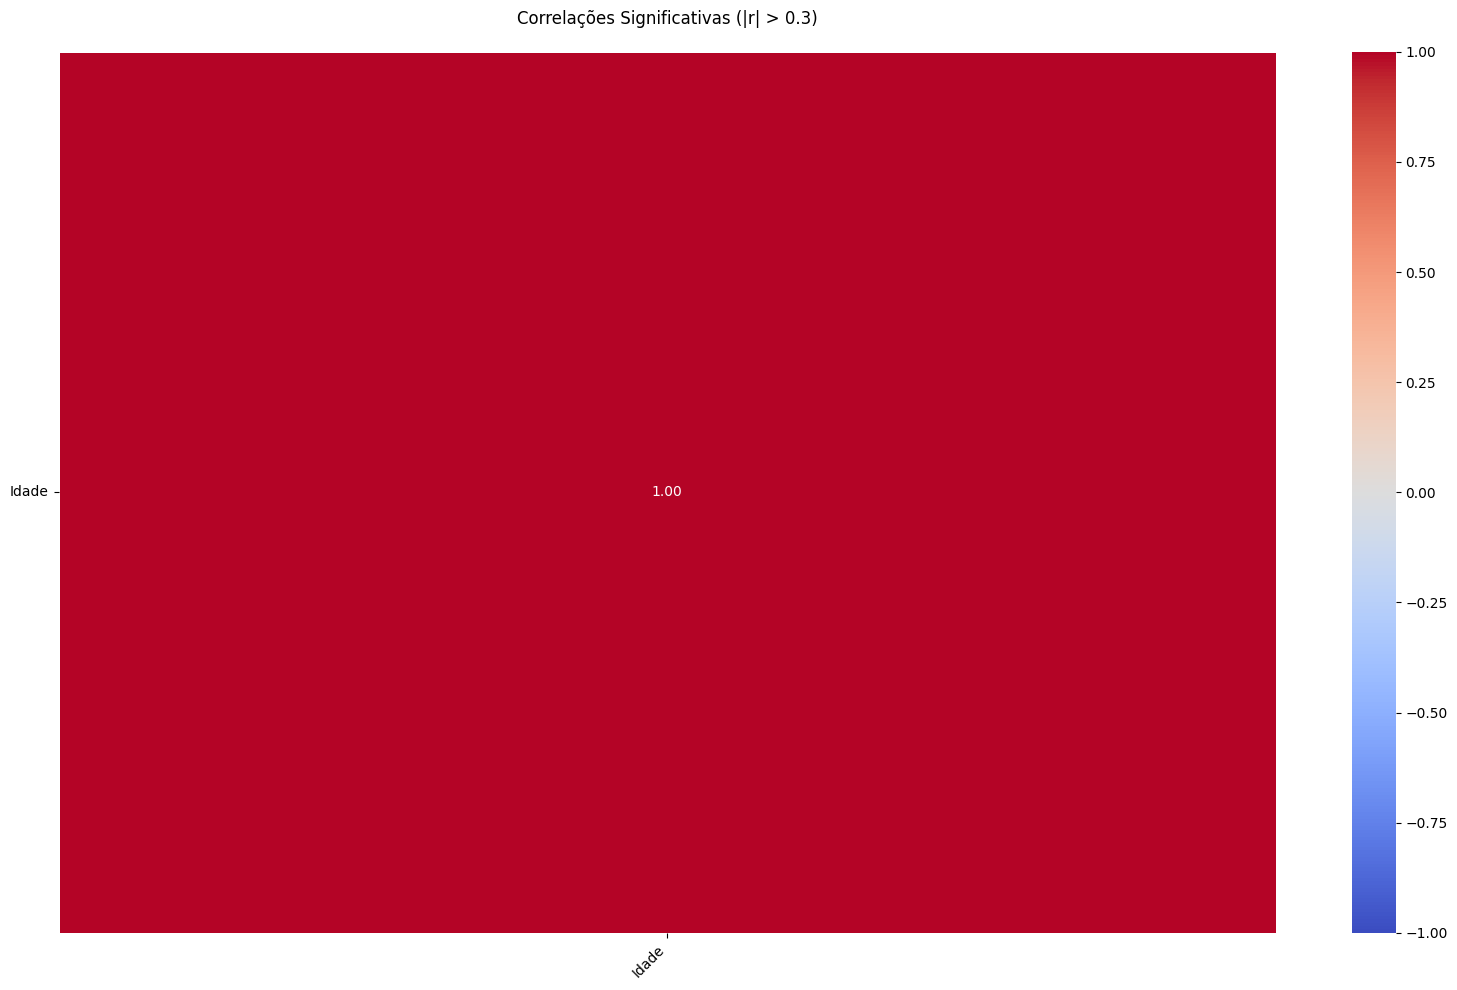

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Codificar variáveis categóricas (excluindo a coluna 'ID')
cols_to_encode = ['Faixa_Etaria', 'Cor_Raca', 'Escolaridade', 'Citologia_Anterior',
                 'Adequabilidade', 'Resultado', 'Tipo_Resultado']
df_encoded = pd.get_dummies(df.drop(columns=['ID', 'Data_Exame']), columns=cols_to_encode)

# 2. Matriz de correlação (apenas para colunas numéricas)
plt.figure(figsize=(16, 10))
corr_matrix = df_encoded.select_dtypes(include=['number']).corr()

# 3. Heatmap com filtro para correlações relevantes
mask = (abs(corr_matrix) < 0.3) & (corr_matrix != 1.0)  # Filtra correlações fracas
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f',
           linewidths=0.5, center=0, vmin=-1, vmax=1)
plt.title('Correlações Significativas (|r| > 0.3)', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()